# Final Assessment: Foss Lab

## Kerala Crime Prediction

### 1. Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import chart_studio.tools as tls
import geopandas as gpd
import shapefile as shp
import seaborn as sns
sns.set()
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Importing Dataset

In [713]:
#Sheet 1
df1=pd.read_excel('Crime Prediction.xlsx')

In [715]:
df1.shape

(2285, 17)

In [717]:
#sheet 1 preprocessing: remving some duplicate data
df1.drop_duplicates(inplace=True)
df1

,event_id,start_time,event_maintype,priority,district_code,locality,place_name,closure_reason,closure_comments,last_update_time,closure_ws_userid,closure_time,near_ps,near_fire_station,near_hospital,addl_info,Unnamed: 16
0,116190,2020-04-01 00:03:40.583,CRIME AGAINST WOMEN,EMERGENCY,Malappuram,NaN,"Chelari, Chelari, Kerala 673635, India",SERVICE DELIVERED,Thenhipalam police called the caller. the call...,2020-04-01 00:05:01.669,azeem,2020-04-01 01:09:36.811,Thenhipalam Ps,NaN,NaN,dispute between husband and wife and he is hur...,NaN
1,NaN,signal_landing_time,disconnect_cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2020-03-31 23:59:23,NORMAL_DISCONNECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2020-04-01 00:11:45,NORMAL_DISCONNECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-04-01 00:50:35,MISSED_CALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,NaN,2020-04-03 06:42:129,REASON_UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2280,117610,2020-04-03 00:02:11.161,OTHERS,HIGH,Thrissur,vadakkekad salafi masjid,"kombatheyilpadi kalloor, Guruvayoor - Althara ...",SERVICE DELIVERED,"Vadakkekkad ps vehicle reached the place , t...",2020-04-03 00:04:51.574,ravi,2020-04-03 01:26:20.801,Vadakkekkad Ps,NaN,Government Hospital,caller informed that some one tresspass in to ...,117611
2282,NaN,2020-04-02 23:55:141,NORMAL_DISCONNECTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2283,NaN,2020-04-03 00:01:1530,MISSED_CALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [718]:
df1=df1.drop(columns='Unnamed: 16')

In [719]:
df1=df1[df1['event_id'].astype(str).str.isdigit()]

In [720]:
######         Sheet-2        ##########
df2=pd.read_excel('Crime Prediction.xlsx',sheet_name=1)


In [721]:
df2=df2[df2['event_id'].astype(str).str.isdigit()]

In [722]:
######         Sheet-3        ##########
df3=pd.read_excel('Crime Prediction.xlsx',sheet_name=2)


In [723]:
df3=df3[df3['event_id'].astype(str).str.isdigit()]


In [726]:
#######        Concatenating three sheets     #######
frames=[df1,df2,df3]
data=pd.concat(frames, sort=False)
data.head(10)

,event_id,start_time,event_maintype,priority,district_code,locality,place_name,closure_reason,closure_comments,last_update_time,closure_ws_userid,closure_time,near_ps,near_fire_station,near_hospital,addl_info
0,116190,2020-04-01 00:03:40.583,CRIME AGAINST WOMEN,EMERGENCY,Malappuram,NaN,"Chelari, Chelari, Kerala 673635, India",SERVICE DELIVERED,Thenhipalam police called the caller. the call...,2020-04-01 00:05:01.669,azeem,2020-04-01 01:09:36.811,Thenhipalam Ps,NaN,NaN,dispute between husband and wife and he is hur...
12,116191,2020-04-01 00:06:44.307,OTHERS,HIGH,Thrissur,NaN,NaN,SERVICE DELIVERED,"kattur ERU attend the event,call is not connec...",2020-04-01 00:08:58.077,azeem,2020-04-01 01:09:56.816,NaN,NaN,NaN,caller informed that suspecious sound from cal...
22,116192,2020-04-01 00:21:21.499,OTHERS,HIGH,Thrissur,NaN,"Moyalan Creamics, Konikkara, Thrissur, Kerala ...",SERVICE DELIVERED,event sent to Ollur ps MDT.POLICE REACHED SOLV...,2020-04-01 00:23:42.565,azeem,2020-04-01 06:51:08.577,Ollur Ps,NaN,Esi Hospital,Caller informed two north indians treaspass in...
28,116193,2020-04-01 00:22:22.236,OTHERS,MEDIUM,Thrissur,NaN,"Mapranam Block Rd, Porathissery, Kerala 680712...",SERVICE DELIVERED,"irinjalakuda ERU reached the spot,nothing to ...",2020-04-01 00:23:44.188,azeem,2020-04-01 01:10:09.843,Irinjalakuda Ps,NaN,Lal Memorial Hospital Mapranam,"gambling loc: mapranam block office back side,..."
37,116194,2020-04-01 01:01:40.984,OTHERS,EMERGENCY,Thiruvananthapuram,NaN,"BSRA K-34, Kakkode lane, Velakudi, Thiruvanant...",SERVICE DELIVERED,pettah ps reached the spot and no person and n...,2020-04-01 01:03:34.322,azeem,2020-04-01 07:55:22.048,Petta Ps,Chacka fire station,Veterinary Hospital Pettah,2 persons jump inside of her compound petta bh...
49,116195,2020-04-01 01:21:47.212,NIZHAL PANIC CALL,EMERGENCY,Ernakulam,NaN,"Unnamed Road, Periyappuram, Kerala 686662, India",SERVICE DELIVERED,"piravom ps, si saju reached location and clear...",2020-04-01 01:22:24.901,azeem,2020-04-01 02:48:49.428,Piravom Ps,NaN,Palachuvadu Ayurveda Hospital,some family issue \nshijo vattamkandathil maki...
54,116196,2020-04-01 01:29:41.512,OTHERS,EMERGENCY,Thrissur,NaN,"Kunnathery - Marekkad - Ashtamichira Rd, Marek...",SERVICE DELIVERED,mala ERU reached the spot but they can't find...,2020-04-01 01:32:31.562,azeem,2020-04-01 02:49:49.372,NaN,NaN,Mariam Theresa Hospital,some on stranger running top of callers house ...
61,116197,2020-04-01 01:53:31.165,OTHERS,EMERGENCY,Wayanad,NaN,"Markkarayil Building, Pulpally Mullenkolly, Pu...",SERVICE DELIVERED,Pulppally police reached the spot solved the p...,2020-04-01 01:56:53.921,azeem,2020-04-01 02:50:07.184,Pulpally Ps IP,NaN,Ph Centre,caller ssaid that a mentaly chalanged man maki...
69,116198,2020-04-01 03:32:39.798,OTHERS,HIGH,Kottayam,NaN,"SH15, Naduvile, Kerala 686146, India",SERVICE DELIVERED,Event dispatched to CRV 12 VAIKOM MDT- SI SURE...,2020-04-01 03:33:50.428,azeem,2020-04-01 06:51:28.057,NaN,NaN,Vsm Hospital,Caller informed that her husaband have some m...
75,116199,2020-04-01 03:37:37.829,CRIME AGAINST WOMEN,EMERGENCY,Kollam,NaN,"Narickal Punalur Rd, Narickal, Kerala 691333, ...",SERVICE DELIVERED,CRV 5 can't reach the place due to vehicle pro...,2020-04-01 03:39:16.309,azeem,2020-04-01 06:54:43.58,Punalur Ps,NaN,Poyanil Hospital,sombosy is knocking the doors of the callers h...


### 3. Data Exploration

In [727]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 2100
Data columns (total 16 columns):
event_id             908 non-null object
start_time           908 non-null object
event_maintype       900 non-null object
priority             860 non-null object
district_code        868 non-null object
locality             113 non-null object
place_name           844 non-null object
closure_reason       908 non-null object
closure_comments     908 non-null object
last_update_time     908 non-null object
closure_ws_userid    908 non-null object
closure_time         908 non-null object
near_ps              639 non-null object
near_fire_station    107 non-null object
near_hospital        733 non-null object
addl_info            901 non-null object
dtypes: object(16)
memory usage: 120.6+ KB


In [599]:
#######      Sorting Data by event id    #######
data.sort_values('event_id',inplace=True)

Number of unique values in each column:

In [728]:
data.nunique()

event_id             908
start_time           908
event_maintype        19
priority               4
district_code         14
locality               6
place_name           712
closure_reason         3
closure_comments     768
last_update_time     908
closure_ws_userid      6
closure_time         908
near_ps              286
near_fire_station     37
near_hospital        338
addl_info            792
dtype: int64

The columns with very few unique values can be thought as of categorical data

In [729]:
# District Names
data.district_code.unique()

array(['Malappuram', 'Thrissur', 'Thiruvananthapuram', 'Ernakulam',
       'Wayanad', 'Kottayam', 'Kollam', 'Palakkad', 'Kozhikode',
       'Alappuzha', 'Kannur', 'Pathanamthitta', nan, 'Idukki',
       'Kasaragod'], dtype=object)

In [730]:
# Number of crimes in each District
hash_crime=data['district_code'].value_counts()
hash_crime=pd.DataFrame({'DISTRICT':hash_crime.index,'values':hash_crime.values})
hash_crime

,DISTRICT,values
0,Thiruvananthapuram,182
1,Thrissur,154
2,Kollam,134
3,Ernakulam,88
4,Alappuzha,71
5,Kozhikode,51
6,Malappuram,37
7,Palakkad,36
8,Kottayam,32
9,Kannur,32


#### Importing kerala shapefile which is a geospatial vector data format used to make a choropleth 

In [783]:
fp = "kerala_shapefiles//district.shp"
map_df = gpd.read_file(fp)

In [784]:
# Importing kerala population dataset to compute per capita crimes in each district
kerala_pop=pd.read_csv(r'kerala_pop.csv')
kerala_pop=kerala_pop.merge(hash_crime,left_on='DISTRICT', right_on='DISTRICT')
kerala_pop['per_capita']=kerala_pop['values'] * 10**7/kerala_pop['Population']
kerala_pop

,DISTRICT,Population,values,per_capita
0,Thiruvananthapuram,3307284,182,550.300488
1,Kollam,2629703,134,509.563247
2,Alappuzha,2121943,71,334.598997
3,Pathanamthitta,1195537,20,167.288842
4,Kottayam,1979384,32,161.666458
5,Idukki,1107453,16,144.475657
6,Ernakulam,3279860,88,268.304135
7,Thrissur,3110327,154,495.124789
8,Palakkad,2810892,36,128.073224
9,Kozhikode,3089543,51,165.072957


In [785]:
# Merging shapefile dataframe with number of crimes dataframe
crime_df=map_df.merge(hash_crime,left_on='DISTRICT', right_on='DISTRICT')
crime_df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry,values
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((76.37334 9.83565, 76.37955 9.82888, ...",71
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((76.68924 10.26721, 76.68724 10.26170...",88
2,Idukki,Kerala,32,9,596,232,"POLYGON ((77.28895 10.22973, 77.29462 10.21643...",16
3,Kannur,Kerala,32,2,589,277,"POLYGON ((75.46997 12.30049, 75.48558 12.29131...",32
4,Kasaragod,Kerala,32,1,588,288,"POLYGON ((75.41667 12.50166, 75.42240 12.48463...",7
5,Kollam,Kerala,32,13,600,314,"POLYGON ((77.20860 9.07053, 77.20579 9.06505, ...",134
6,Kottayam,Kerala,32,10,597,320,"POLYGON ((76.63309 9.85565, 76.63167 9.85296, ...",32
7,Kozhikode,Kerala,32,4,591,321,"POLYGON ((75.53697 11.69275, 75.54093 11.69615...",51
8,Malappuram,Kerala,32,5,592,358,"POLYGON ((76.44699 11.20171, 76.44112 11.20301...",37
9,Palakkad,Kerala,32,6,593,422,"POLYGON ((76.83918 10.33834, 76.83516 10.33669...",36


In [786]:
# Merging shapefile dataframe with per-capita dataframe
per_capita_df=map_df.merge(kerala_pop,left_on='DISTRICT', right_on='DISTRICT')
per_capita_df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry,Population,values,per_capita
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((76.37334 9.83565, 76.37955 9.82888, ...",2121943,71,334.598997
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((76.68924 10.26721, 76.68724 10.26170...",3279860,88,268.304135
2,Idukki,Kerala,32,9,596,232,"POLYGON ((77.28895 10.22973, 77.29462 10.21643...",1107453,16,144.475657
3,Kannur,Kerala,32,2,589,277,"POLYGON ((75.46997 12.30049, 75.48558 12.29131...",2525637,32,126.700710
4,Kollam,Kerala,32,13,600,314,"POLYGON ((77.20860 9.07053, 77.20579 9.06505, ...",2629703,134,509.563247
5,Kottayam,Kerala,32,10,597,320,"POLYGON ((76.63309 9.85565, 76.63167 9.85296, ...",1979384,32,161.666458
6,Kozhikode,Kerala,32,4,591,321,"POLYGON ((75.53697 11.69275, 75.54093 11.69615...",3089543,51,165.072957
7,Malappuram,Kerala,32,5,592,358,"POLYGON ((76.44699 11.20171, 76.44112 11.20301...",4110956,37,90.003396
8,Palakkad,Kerala,32,6,593,422,"POLYGON ((76.83918 10.33834, 76.83516 10.33669...",2810892,36,128.073224
9,Pathanamthitta,Kerala,32,12,599,436,"POLYGON ((77.28437 9.27130, 77.28459 9.26677, ...",1195537,20,167.288842


#### Making a choropleth of total crimes by district in Kerala

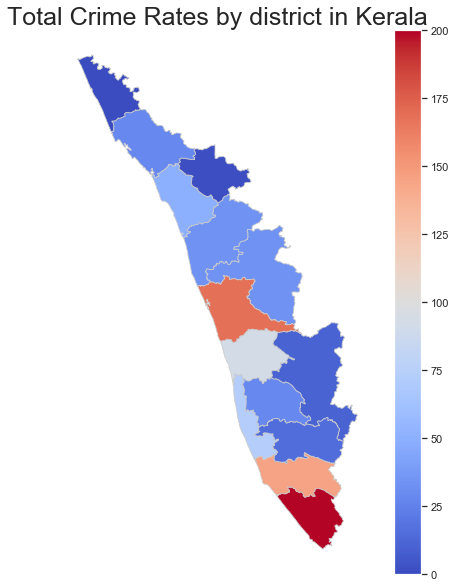

In [735]:
vmin, vmax=0 ,200
fig, ax = plt.subplots(1, figsize=(8, 10))
ax.axis('off')
ax.set_title('Total Crime Rates by district in Kerala', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
crime_df.plot(column='values', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')

#### Making a choropleth of per capita crimes in Kerala by District

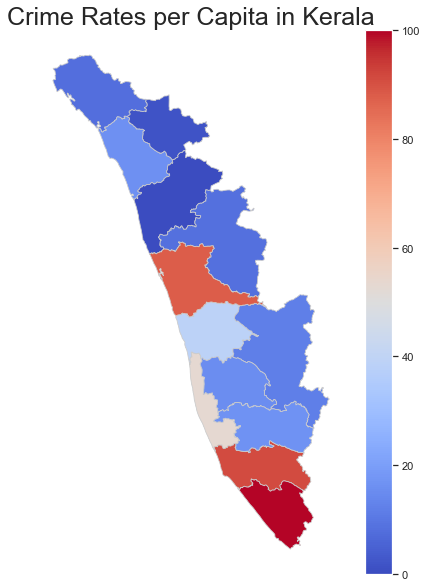

In [803]:
vmin, vmax=0 ,100
fig, ax = plt.subplots(1, figsize=(8, 10))
ax.axis('off')
ax.set_title('Crime Rates per Capita in Kerala', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
per_capita_df.plot(column='per_capita', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')

### Conclusion: We can infer from the choropeth that the the regions surrounding the capital of the state has high crime rates per capita as compared to northern districts. 

#### Crime Type Analysis

In [610]:
# Number of unique crime types 
data.event_maintype.unique()


array(['CRIME AGAINST WOMEN', 'OTHERS', 'NIZHAL PANIC CALL', 'MISSING',
       'PERSON COLLAPSED', 'ACCIDENT', 'WATER RESCUE',
       'BREATHING DIFFICULTIES', 'FIRE', 'THREAT', nan, 'MEDICAL SUPPLY',
       'FOOD SUPPLY', 'THEFT', 'BLEEDING', 'GAS LEAKAGE', 'BUILDING FIRE',
       'HEART ATTACK', 'FLOOD', 'INTER HOSPITAL TRANSFER'], dtype=object)

In [787]:
# Create a Data Frame of crime types and their respective number of crimes
crime_type=data['event_maintype'].value_counts()
crime_type=pd.DataFrame({'event_type':crime_type.index,'values':crime_type.values})
crime_type

,event_type,values
0,OTHERS,732
1,MEDICAL SUPPLY,50
2,CRIME AGAINST WOMEN,37
3,FOOD SUPPLY,24
4,ACCIDENT,18
5,PERSON COLLAPSED,8
6,FIRE,7
7,NIZHAL PANIC CALL,5
8,MISSING,4
9,THEFT,3


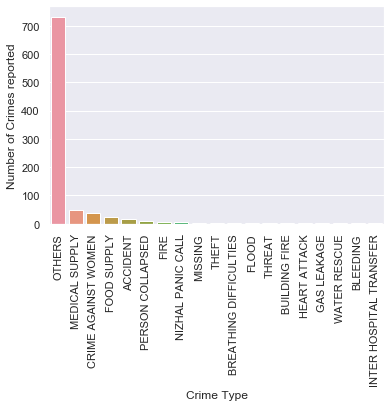

In [804]:
# Plotting the crime type and number of crimes reported
ax = sns.barplot(x="event_type", y="values", data = crime_type)
ax.set(xlabel='Crime Type', ylabel='Number of Crimes reported')
ax.set_xticklabels(crime_type['event_type'],rotation=90)
plt.show()

### Conclusion: There needs to be done some improvements to the 'Crime Type' column of the dataset as this data is not properly classified, 'OTHERS' value highly dominates the field. This indicates negligence by the officials to fill the column.

#### Converting the start_time and closure_time to time resolution

In [613]:
s_time=data['start_time']
day=pd.to_datetime(data.start_time).dt.day
hour=pd.to_datetime(data.start_time).dt.hour
minute=pd.to_datetime(data.start_time).dt.minute
time_df=pd.DataFrame({'event_id':data['event_id'],'priority':data['priority'],'original':data['start_time'],'day':day,'hour':hour,'minutes':minute})

In [614]:
time_df

,event_id,priority,original,day,hour,minutes
0,116190,EMERGENCY,2020-04-01 00:03:40.583,1,0,3
12,116191,HIGH,2020-04-01 00:06:44.307,1,0,6
22,116192,HIGH,2020-04-01 00:21:21.499,1,0,21
28,116193,MEDIUM,2020-04-01 00:22:22.236,1,0,22
37,116194,EMERGENCY,2020-04-01 01:01:40.984,1,1,1
...,...,...,...,...,...,...
2071,121498,EMERGENCY,2020-04-09 10:00:32.626,9,10,0
2079,121499,HIGH,2020-04-09 10:01:39.33,9,10,1
2089,121500,EMERGENCY,2020-04-09 10:02:54.576,9,10,2
2095,121501,HIGH,2020-04-09 10:04:06.534,9,10,4


In [615]:
hour_df=time_df.groupby(['hour'])['event_id'].count()
hour_df=pd.DataFrame({'hour':hour_df.index,'values':hour_df.values})
hour_df

,hour,values
0,0,41
1,1,36
2,2,23
3,3,22
4,4,12
5,5,24
6,6,72
7,7,164
8,8,222
9,9,179


#### Number of crimes reported over days grouped by timing of the crime 

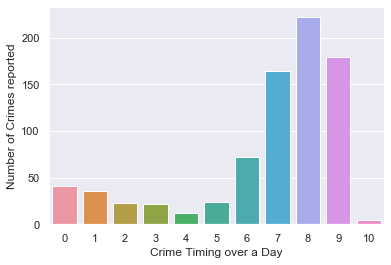

In [788]:
ax2 = sns.barplot(x="hour", y="values", data = hour_df)
ax2.set(xlabel='Crime Timing over a Day', ylabel='Number of Crimes reported')
ax2.set_xticklabels(hour_df['hour'])
plt.show()

In [794]:
close_df=data['closure_reason'].value_counts()

In [795]:
close_df=pd.DataFrame({'reason':close_df.index,'values':close_df.values})
close_df

,reason,values
0,SERVICE DELIVERED,826
1,INFORMATION FORWARDED,76
2,ACCIDENTALY REGISTERED,6


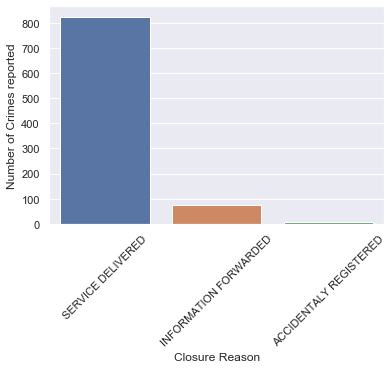

In [798]:
ax2 = sns.barplot(x="reason", y="values", data = close_df)
ax2.set(xlabel='Closure Reason', ylabel='Number of Crimes reported')
ax2.set_xticklabels(close_df['reason'],rotation='45')
plt.show()

In [789]:

start_df=pd.to_datetime(data['start_time'])
end_df=pd.to_datetime(data['closure_time'])
time_dataframe=pd.DataFrame({'event_id':data['event_id'],'start_time':start_df,'closure_time':end_df,'priority':data['priority'],
                             'district':data['district_code'],'type':data['event_maintype']})

In [307]:
time_dataframe

,event_id,start_time,closure_time,priority,district,type
0,116190,2020-04-01 00:03:40.583,2020-04-01 01:09:36.811,EMERGENCY,Malappuram,CRIME AGAINST WOMEN
12,116191,2020-04-01 00:06:44.307,2020-04-01 01:09:56.816,HIGH,Thrissur,OTHERS
22,116192,2020-04-01 00:21:21.499,2020-04-01 06:51:08.577,HIGH,Thrissur,OTHERS
28,116193,2020-04-01 00:22:22.236,2020-04-01 01:10:09.843,MEDIUM,Thrissur,OTHERS
37,116194,2020-04-01 01:01:40.984,2020-04-01 07:55:22.048,EMERGENCY,Thiruvananthapuram,OTHERS
...,...,...,...,...,...,...
2071,121498,2020-04-09 10:00:32.626,2020-04-09 11:05:16.515,EMERGENCY,Thrissur,OTHERS
2079,121499,2020-04-09 10:01:39.330,2020-04-09 10:53:51.063,HIGH,Thiruvananthapuram,OTHERS
2089,121500,2020-04-09 10:02:54.576,2020-04-09 10:30:34.360,EMERGENCY,Alappuzha,OTHERS
2095,121501,2020-04-09 10:04:06.534,2020-04-09 10:54:37.279,HIGH,Ernakulam,OTHERS


In [688]:
# Calculating resolution time
time_dataframe['time_elapsed']=(time_dataframe['closure_time']-time_dataframe['start_time']).dt.total_seconds()/60.0
time_dataframe['closure_reason']=data['closure_reason']

time_dataframe

,event_id,start_time,closure_time,priority,district,type,time_elapsed,closure_reason
0,116190,2020-04-01 00:03:40.583,2020-04-01 01:09:36.811,EMERGENCY,Malappuram,CRIME AGAINST WOMEN,65.937133,SERVICE DELIVERED
12,116191,2020-04-01 00:06:44.307,2020-04-01 01:09:56.816,HIGH,Thrissur,OTHERS,63.208483,SERVICE DELIVERED
22,116192,2020-04-01 00:21:21.499,2020-04-01 06:51:08.577,HIGH,Thrissur,OTHERS,389.784633,SERVICE DELIVERED
28,116193,2020-04-01 00:22:22.236,2020-04-01 01:10:09.843,MEDIUM,Thrissur,OTHERS,47.793450,SERVICE DELIVERED
37,116194,2020-04-01 01:01:40.984,2020-04-01 07:55:22.048,EMERGENCY,Thiruvananthapuram,OTHERS,413.684400,SERVICE DELIVERED
...,...,...,...,...,...,...,...,...
2071,121498,2020-04-09 10:00:32.626,2020-04-09 11:05:16.515,EMERGENCY,Thrissur,OTHERS,64.731483,INFORMATION FORWARDED
2079,121499,2020-04-09 10:01:39.330,2020-04-09 10:53:51.063,HIGH,Thiruvananthapuram,OTHERS,52.195550,INFORMATION FORWARDED
2089,121500,2020-04-09 10:02:54.576,2020-04-09 10:30:34.360,EMERGENCY,Alappuzha,OTHERS,27.663067,SERVICE DELIVERED
2095,121501,2020-04-09 10:04:06.534,2020-04-09 10:54:37.279,HIGH,Ernakulam,OTHERS,50.512417,SERVICE DELIVERED


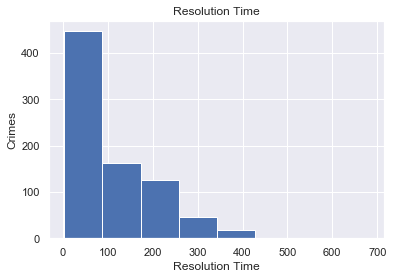

In [689]:
time_dataframe['time_elapsed'].plot.hist(grid=True,bins=8)
plt.title('Resolution Time')
plt.xlabel('Resolution Time')
plt.ylabel('Crimes')
plt.show()

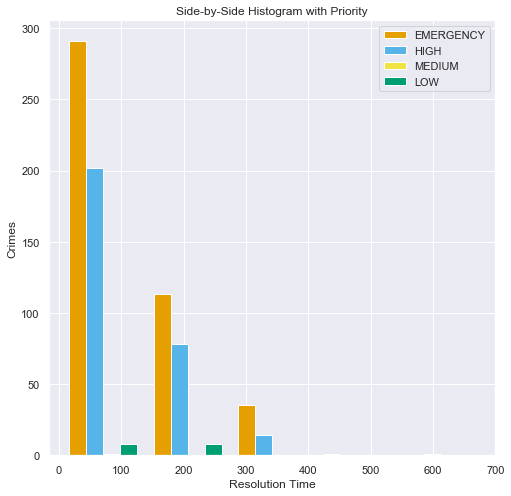

In [624]:
# Make a separate list for each priority
x1 = list(time_dataframe[time_dataframe['priority'] == 'EMERGENCY']['time_elapsed'])
x2 = list(time_dataframe[time_dataframe['priority'] == 'HIGH']['time_elapsed'])
x3 = list(time_dataframe[time_dataframe['priority'] == 'LOW']['time_elapsed'])
x4 = list(time_dataframe[time_dataframe['priority'] == 'MEDIUM']['time_elapsed'])
# Assign colors for each priority and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
names = ['EMERGENCY', 'HIGH', 'MEDIUM','LOW']
plt.figure(figsize=(8,8))
# Make the histogram using a list of lists
# Normalize the priority and assign colors and names
plt.hist([x1, x2, x3, x4], bins = int(5),
         color = colors, label=names)

# Plot formatting

plt.legend()
#plt.xlim(0, 500)
plt.xlabel('Resolution Time')
plt.ylabel('Crimes')
plt.title('Side-by-Side Histogram with Priority')
plt.show()

In [625]:
t=time_dataframe.groupby('district')['time_elapsed'].mean()
t=pd.DataFrame({'DISTRICT':t.index,'time_elapsed':t.values})
t

,DISTRICT,time_elapsed
0,Alappuzha,94.025865
1,Ernakulam,88.942642
2,Idukki,148.323178
3,Kannur,138.145472
4,Kasaragod,70.455698
5,Kollam,113.603232
6,Kottayam,112.308823
7,Kozhikode,105.184855
8,Malappuram,97.587159
9,Palakkad,139.984774


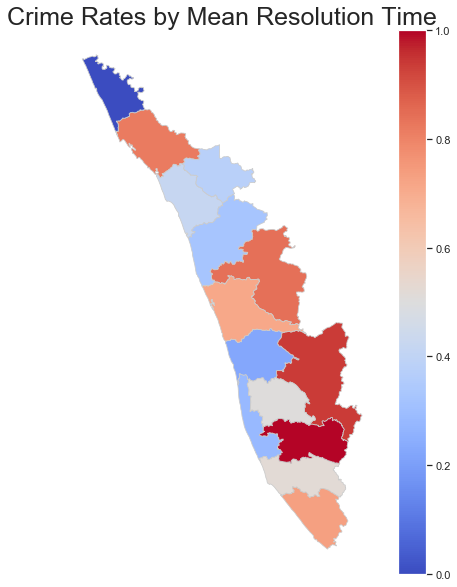

In [802]:
crime_df=map_df.merge(t,left_on='DISTRICT', right_on='DISTRICT')
vmin, vmax=0 ,400
fig, ax = plt.subplots(1, figsize=(8, 10))
ax.axis('off')
ax.set_title('Crime Rates by Mean Resolution Time', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='coolwarm')#, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
crime_df.plot(column='time_elapsed', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')

### Conclusion: We can infer from the choropeth that the south eastern districts have high resolution time as compared to western-central districts. This may be due to the proximity to the capital of the state and hence more pressure on the law enforcement institutes.

### 4. Crime Type classification using nltk

In [799]:
import nltk

data['addl_info']=data['addl_info'].astype('str')


In [628]:
import string
words=[]
for x in data[data['event_maintype']=='OTHERS']['addl_info']:
    table = str.maketrans('', '', string.punctuation)
    words.extend(nltk.tokenize.WordPunctTokenizer().tokenize(x.translate(table)))
len(words)

9858

In [629]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w.lower() for w in words]
filtered_sentence = [w for w in words if not w in stop_words]  
  
filtered_sentence = []  
  
for w in words:  
    if w not in stop_words:  
        filtered_sentence.append(w)  
filtered_sentence=[word for word in filtered_sentence if word.isalpha() or len(word)==1]
filtered_sentence

['caller',
 'informed',
 'suspecious',
 'sound',
 'callers',
 'home',
 'addressedachali',
 'house',
 'edathirinji',
 'kattoor',
 'ps',
 'caller',
 'informed',
 'two',
 'north',
 'indians',
 'treaspass',
 'house',
 'started',
 'fighting',
 'loc',
 'ollur',
 'ps',
 'maruthakara',
 'singal',
 'junction',
 'gambling',
 'loc',
 'mapranam',
 'block',
 'office',
 'back',
 'sidelaksham',
 'veed',
 'colonyirinjalakuda',
 'ps',
 '2',
 'persons',
 'jump',
 'inside',
 'compound',
 'petta',
 'bhagathsingh',
 'line',
 'opposite',
 'anganavady',
 'stranger',
 'running',
 'top',
 'callers',
 'house',
 'near',
 'mareakkad',
 'juma',
 'masjid',
 'kunnathery',
 'marekkad',
 'ashtamichira',
 'rd',
 'caller',
 'ssaid',
 'mentaly',
 'chalanged',
 'man',
 'making',
 'problems',
 'need',
 'police',
 'help',
 'pulpally',
 'ps',
 'limit',
 'pathirikudiyanmala',
 'con',
 'caller',
 'informed',
 'husaband',
 'medical',
 'issueneed',
 'ambulance',
 'help',
 'action',
 'locvallakom',
 'sub',
 'stationvaikom',
 'ps'

In [630]:
freq=nltk.FreqDist(filtered_sentence)
for key,val in freq.items():
    print(str(key)+':'+str(val))

caller:199
informed:96
suspecious:3
sound:8
callers:21
home:20
addressedachali:1
house:81
edathirinji:1
kattoor:1
ps:354
two:8
north:21
indians:6
treaspass:1
started:2
fighting:2
loc:137
ollur:1
maruthakara:1
singal:1
junction:33
gambling:4
mapranam:1
block:5
office:10
back:10
sidelaksham:1
veed:2
colonyirinjalakuda:1
2:7
persons:17
jump:1
inside:8
compound:5
petta:1
bhagathsingh:1
line:9
opposite:12
anganavady:1
stranger:2
running:4
top:1
near:281
mareakkad:1
juma:7
masjid:10
kunnathery:1
marekkad:1
ashtamichira:1
rd:8
ssaid:1
mentaly:1
chalanged:1
man:26
making:37
problems:6
need:63
police:53
help:41
pulpally:1
limit:56
pathirikudiyanmala:1
con:4
husaband:1
medical:7
issueneed:1
ambulance:25
action:1
locvallakom:1
sub:2
stationvaikom:1
people:187
gathering:81
related:7
fish:60
selling:28
neat:1
ice:2
plant:2
industrial:1
estate:4
beach:14
road:50
heavy:8
croud:1
side:20
kumbalangi:1
st:10
joseph:3
church:27
peoples:36
gatherd:5
porukkara:1
muslim:2
chavara:5
panamana:1
service:14
koc

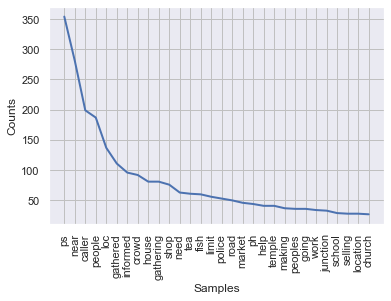

In [800]:
# This is the frequency plot of the additional information column after text prepropressing
freq.plot(30)

### 5. Regression

### I will be using Random Forest Regressor to predict resolution time from the given set of features

In [696]:
# Classify_df is the dataframe for classification
classify_df=time_dataframe.copy()
classify_df

,event_id,start_time,closure_time,priority,district,type,time_elapsed,closure_reason
0,116190,2020-04-01 00:03:40.583,2020-04-01 01:09:36.811,EMERGENCY,Malappuram,CRIME AGAINST WOMEN,65.937133,SERVICE DELIVERED
12,116191,2020-04-01 00:06:44.307,2020-04-01 01:09:56.816,HIGH,Thrissur,OTHERS,63.208483,SERVICE DELIVERED
22,116192,2020-04-01 00:21:21.499,2020-04-01 06:51:08.577,HIGH,Thrissur,OTHERS,389.784633,SERVICE DELIVERED
28,116193,2020-04-01 00:22:22.236,2020-04-01 01:10:09.843,MEDIUM,Thrissur,OTHERS,47.793450,SERVICE DELIVERED
37,116194,2020-04-01 01:01:40.984,2020-04-01 07:55:22.048,EMERGENCY,Thiruvananthapuram,OTHERS,413.684400,SERVICE DELIVERED
...,...,...,...,...,...,...,...,...
2071,121498,2020-04-09 10:00:32.626,2020-04-09 11:05:16.515,EMERGENCY,Thrissur,OTHERS,64.731483,INFORMATION FORWARDED
2079,121499,2020-04-09 10:01:39.330,2020-04-09 10:53:51.063,HIGH,Thiruvananthapuram,OTHERS,52.195550,INFORMATION FORWARDED
2089,121500,2020-04-09 10:02:54.576,2020-04-09 10:30:34.360,EMERGENCY,Alappuzha,OTHERS,27.663067,SERVICE DELIVERED
2095,121501,2020-04-09 10:04:06.534,2020-04-09 10:54:37.279,HIGH,Ernakulam,OTHERS,50.512417,SERVICE DELIVERED


In [697]:
classify_df['start_time']=classify_df['start_time'].dt.hour
classify_df['closure_time']=classify_df['closure_time'].dt.hour

In [698]:
classify_df=classify_df.drop('event_id',axis=1)
classify_df

,start_time,closure_time,priority,district,type,time_elapsed,closure_reason
0,0,1,EMERGENCY,Malappuram,CRIME AGAINST WOMEN,65.937133,SERVICE DELIVERED
12,0,1,HIGH,Thrissur,OTHERS,63.208483,SERVICE DELIVERED
22,0,6,HIGH,Thrissur,OTHERS,389.784633,SERVICE DELIVERED
28,0,1,MEDIUM,Thrissur,OTHERS,47.793450,SERVICE DELIVERED
37,1,7,EMERGENCY,Thiruvananthapuram,OTHERS,413.684400,SERVICE DELIVERED
...,...,...,...,...,...,...,...
2071,10,11,EMERGENCY,Thrissur,OTHERS,64.731483,INFORMATION FORWARDED
2079,10,10,HIGH,Thiruvananthapuram,OTHERS,52.195550,INFORMATION FORWARDED
2089,10,10,EMERGENCY,Alappuzha,OTHERS,27.663067,SERVICE DELIVERED
2095,10,10,HIGH,Ernakulam,OTHERS,50.512417,SERVICE DELIVERED


In [704]:
###### One hot encoding of categorical features  ####
priority=classify_df[['priority']]
priority=pd.get_dummies(priority , drop_first = True)
crimetype=classify_df[['type']]
crimetype=pd.get_dummies(crimetype , drop_first = True)
close=classify_df[['closure_reason']]
close=pd.get_dummies(close , drop_first = True)
district=classify_df[['district']]
district=pd.get_dummies(district , drop_first = True)
final=pd.concat([priority,crimetype,close,district,classify_df['start_time'],classify_df['closure_time']],axis=1)
final


,priority_HIGH,priority_LOW,priority_MEDIUM,type_BLEEDING,type_BREATHING DIFFICULTIES,type_BUILDING FIRE,type_CRIME AGAINST WOMEN,type_FIRE,type_FLOOD,type_FOOD SUPPLY,...,district_Kottayam,district_Kozhikode,district_Malappuram,district_Palakkad,district_Pathanamthitta,district_Thiruvananthapuram,district_Thrissur,district_Wayanad,start_time,closure_time
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,6
28,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,10,11
2079,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10,10
2089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,10
2095,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,10


In [655]:
# Importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [705]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split
y=classify_df["time_elapsed"]
X=final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [706]:
# Training the model
from sklearn.ensemble import RandomForestRegressor
params={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
forest_regressor = RandomizedSearchCV(RandomForestRegressor(), params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
forest_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [707]:
forest_regressor.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [710]:
y_pred_forest=forest_regressor.predict(X_test)

In [711]:
def rmse(y_test,y_pred):
  return np.sqrt(mean_squared_error(y_test,y_pred))

In [712]:
print("Root Mean Squared Error = {}".format(rmse(y_test,y_pred_forest)))
print("r2 score = {}".format(r2_score(y_test,y_pred_forest)))


Root Mean Squared Error = 22.613846386432918
r2 score = 0.9287327153911598
